In [1]:
import os

In [2]:
#указываем переменным конкретные пути в папки с данными
base_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset'#основной каталог
train_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set'#каталог с обучающими данными
validation_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\validation_set'
test_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\test_set'

In [3]:
#указываем переменным конкретные пути в папки с данными 
train_cats_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\test_set\cats' #данные для обучения с котиками
train_dogs_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\test_set\dogs' #данные для обучения с собачками
validation_cats_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\cats'
validation_dogs_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\dogs'
test_cats_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\validation_set\cats'
test_dogs_dir = r'D:\Batman\Pictures\cats_vs_dogs\dataset\validation_set\dogs'

In [4]:
 #смотрим сколько данных в каждой папке 
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 3400
total validation dog images: 3400
total test cat images: 600
total test dog images: 600


In [5]:
#Создание небольшой сверточной нейронной сети для классификации изображений кошек и собак
#Архитектура сети
#1 Слой свертки, размер ядра 3х3, количество карт признаков - 32 шт., функция активации ReLU.
#2 Слой подвыборки, выбор максимального значения из квадрата 2х2
#3 Слой свертки, размер ядра 3х3, количество карт признаков - 32 шт., функция активации ReLU.
#4 Слой подвыборки, выбор максимального значения из квадрата 2х2
#5 Слой свертки, размер ядра 3х3, количество карт признаков - 64 шт., функция активации ReLU.
#6 Слой подвыборки, выбор максимального значения из квадрата 2х2
#7 Слой преобразования из двумерного в одномерное представление
#8 Полносвязный слой, 64 нейрона, функция активации ReLU.
#9 Слой Dropout.
#10 Выходной слой, 1 нейрон, функция активации sigmoid
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
# Настройка модели для обучения
from keras import optimizers
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['acc'])
#Предварительная обработка данных
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150),
 batch_size=50,
 class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

In [6]:
# Обучение модели с использованием генератора пакетов
history = model.fit_generator(
 train_generator,
 steps_per_epoch=19,
 epochs=19,
 validation_data=validation_generator,
 validation_steps=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/19


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[{{node metrics/acc/Mean_1}}]]

In [ ]:
#Построение графиков обучения
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
model.save('cats_and_dogs_3.h5')

In [10]:
model_json=model.to_json()
json_file=open("cat_vs_dogs_3.json", "w")
json_file.write(model_json)
json_file.close()

In [11]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

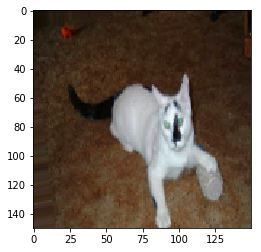

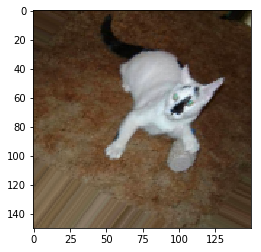

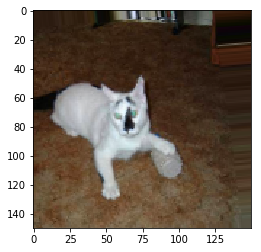

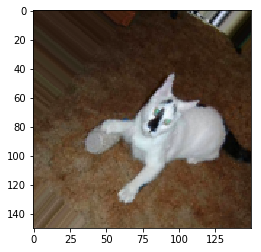

In [12]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
 fname in os.listdir(train_cats_dir)]
img_path = fnames[55]# Вывод случайного изображения в качестве примера
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) 
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 optimizer="adam",
 metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150), 
 batch_size=32,
 class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=32,
 class_mode='binary')
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=100,
 validation_data=validation_generator,
 validation_steps=50)

Found 6800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 231ms/step - loss: 0.7017 - acc: 0.5044 - val_loss: 0.6998 - val_acc: 0.5051
Epoch 2/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6866 - acc: 0.5356 - val_loss: 0.7058 - val_acc: 0.5202
Epoch 3/100
100/100 [==============================] - 21s 213ms/step - loss: 0.6661 - acc: 0.5744 - val_loss: 0.6836 - val_acc: 0.5259
Epoch 4/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6690 - acc: 0.5763 - val_loss: 0.6760 - val_acc: 0.5695
Epoch 5/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6673 - acc: 0.5706 - val_loss: 0.6815 - val_acc: 0.5240
Epoch 6/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6545 - acc: 0.5978 - val_loss: 0.6416 - val_acc: 0.6294
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6501 - acc: 0.6047 -

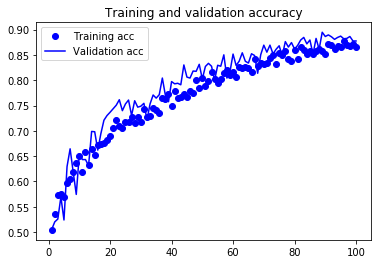

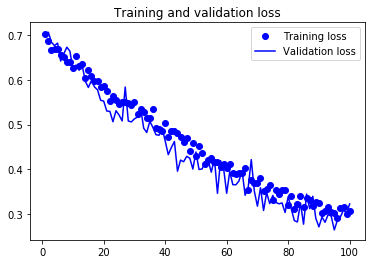

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
model.save('cats_and_dogs_4.h5')

In [18]:
model_json=model.to_json()
json_file=open("cat_vs_dogs_4.json", "w")
json_file.write(model_json)
json_file.close()